In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os

# Load the dataset

In [2]:
directory = '../data'
file_name = 'boston_housing.csv'

In [3]:
df = pd.read_csv(os.path.join(directory,file_name))

# Explore the data structure, types, and summary statistics.

In [4]:
# Viewing top 5 rows of dataset
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
## shape of the dataset
print('shape of the dataset =', df.shape)

shape of the dataset = (506, 14)


In [6]:
# Data Types of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [7]:
# Summary Statistics
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### The dataset consists of following Features:
- CRIM: per capita crime rate by town.
- ZN: proportion of residential land zoned for lots over 25,000 sq. ft.
- INDUS: proportion of non-retail business acres per town.
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitrogen oxides concentration (parts per 10 million).
- RM: average number of rooms per dwelling.
- AGE: proportion of owner-occupied units built prior to 1940.
- DIS: weighted distances to five Boston employment centers.
- RAD: index of accessibility to radial highways.
- TAX: full-value property-tax rate per 10,000 dollars
- PTRATIO: pupil-teacher ratio by town.
- B: 1000(Bk - 0.63)^2 where Bk is the proportion of black residents by town.
- LSTAT: percentage of lower status of the population.
- **MEDV**: median value of owner-occupied homes in 1000s dollars. This is **target variable**

#### The dataset has 506 rows, 13 features and 1 target variabel.
#### All features are numeric type
#### Scale of features differ largely. Mean of fsome features are 100th order, some 10th order some 10s order and some are in 100s order

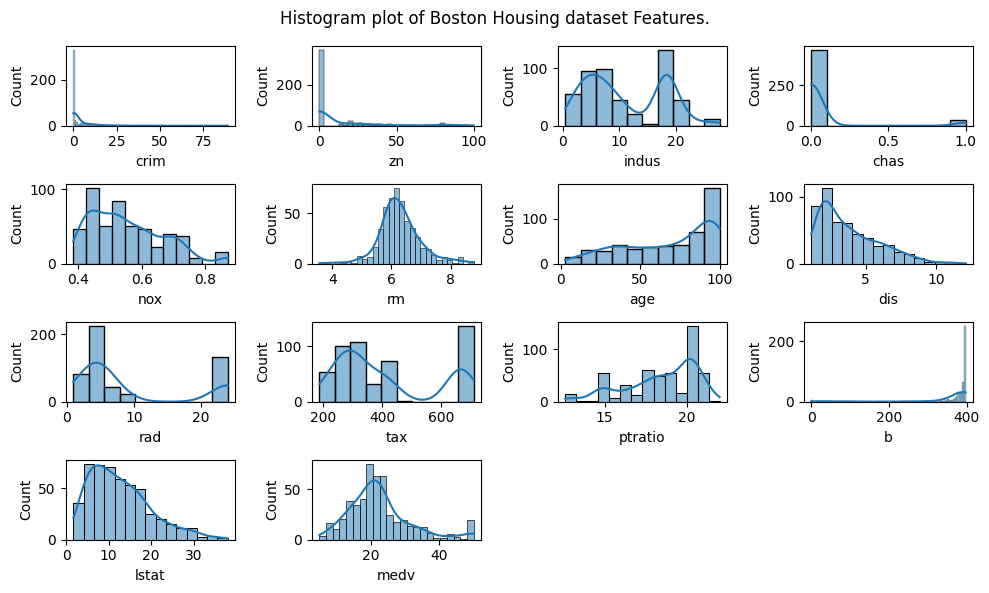

In [15]:
### Uni-variate visualization: Visualize histogram and boxplot of each variables
## visualize histogram
def my_histogram(df, fig_size, subplot_rows, subplot_cols):
    # select numeric columns
    numeric_columns = df.select_dtypes(include=np.number).columns
    
    ## check number of sub-plots
    if subplot_rows*subplot_cols < len(numeric_columns):
        print('Number of subplots are insufficient.')
        print('Number of columns: ', len(numeric_columns))
        print('Number of subplots: ', subplot_rows, ' x ', subplot_cols)
        return None
        
    fig, axs = plt.subplots(subplot_rows, subplot_cols, figsize=fig_size)
    
    ## first turn axis off all axs
    for ax in axs:
        if len(ax)>1:
            for axis in ax:
                axis.set_axis_off()
        else:
            ax.set_axis_off()
        
    row_index = 0
    col_index = 0
    for col in numeric_columns:              
        # make required axis visible
        axs[row_index, col_index].set_axis_on()
        sns.histplot(df[col], ax=axs[row_index, col_index], kde=True)
#         ax=axs[row_index, col_index].title.set_text(col)
        col_index += 1
        if col_index == subplot_cols:
            col_index = 0
            row_index += 1
            
    fig.suptitle("Histogram plot of Boston Housing dataset Features.")
    plt.tight_layout()
    plt.show()
my_histogram(df, fig_size=(10,6),subplot_rows=4, subplot_cols=4)

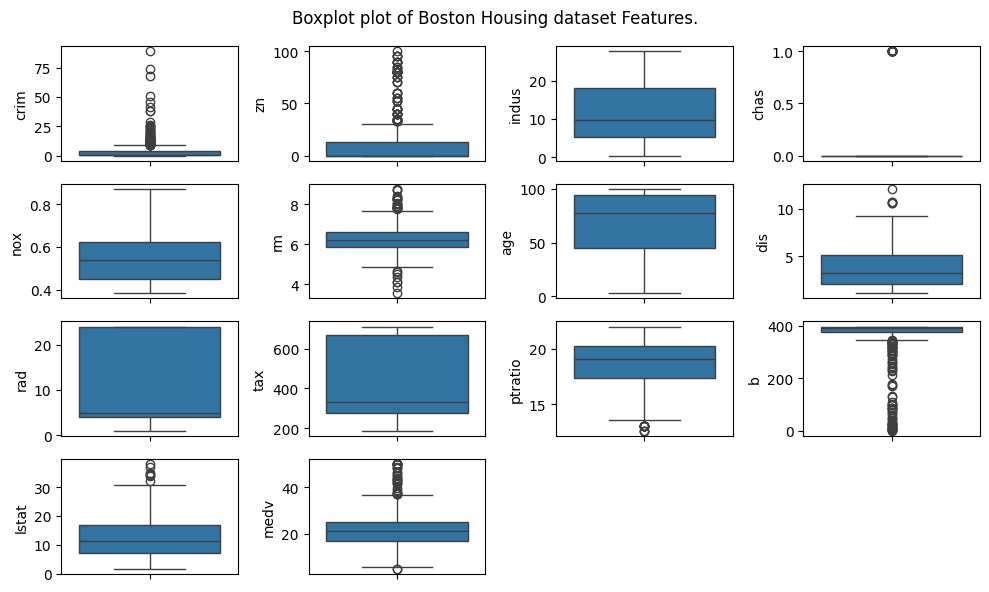

In [9]:
## visualize boxplot
def my_boxplot(df, fig_size, subplot_rows, subplot_cols):
    # select numeric columns
    numeric_columns = df.select_dtypes(include=np.number).columns
    
    ## check number of sub-plots
    if subplot_rows*subplot_cols < len(numeric_columns):
        print('Number of subplots are insufficient.')
        print('Number of columns: ', len(numeric_columns))
        print('Number of subplots: ', subplot_rows, ' x ', subplot_cols)
        return None
        
    fig, axs = plt.subplots(subplot_rows, subplot_cols, figsize=fig_size)
    
    ## first turn axis off all axs
    for ax in axs:
        if len(ax)>1:
            for axis in ax:
                axis.set_axis_off()
        else:
            ax.set_axis_off()
        
    row_index = 0
    col_index = 0
    for col in numeric_columns:              
        # make required axis visible
        axs[row_index, col_index].set_axis_on()
        sns.boxplot(df[col], ax=axs[row_index, col_index])
#         ax=axs[row_index, col_index].title.set_text(col)
        col_index += 1
        if col_index == subplot_cols:
            col_index = 0
            row_index += 1
            
    fig.suptitle("Boxplot plot of Boston Housing dataset Features.")
    plt.tight_layout()
    plt.show()
my_boxplot(df, fig_size=(10,6),subplot_rows=4, subplot_cols=4)

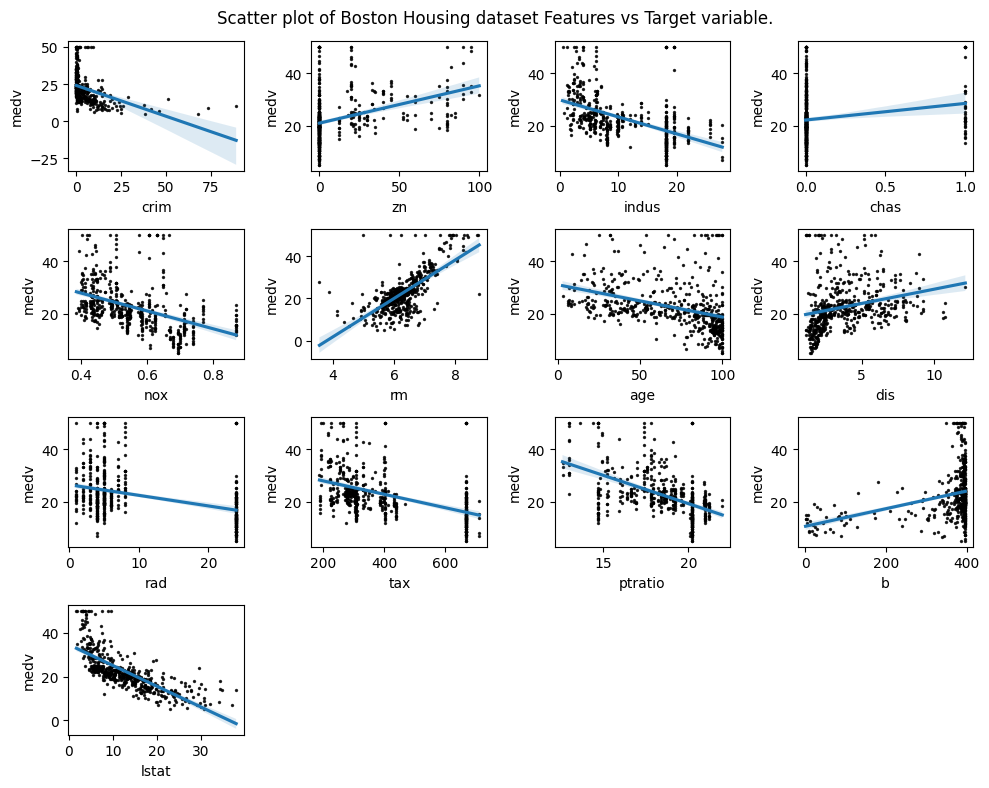

In [14]:
### Bi-variate visualization
## scatter plot
def my_scatter_plot(df, target_column, fig_size, subplot_rows, subplot_cols):
    # select numeric columns
    numeric_columns = df.select_dtypes(include=np.number).columns
    
    ## check number of sub-plots
    if subplot_rows*subplot_cols < len(numeric_columns)-1:
        print('Number of subplots are insufficient.')
        print('Number of columns: ', len(numeric_columns))
        print('Number of subplots: ', subplot_rows, ' x ', subplot_cols)
        return None
        
    fig, axs = plt.subplots(subplot_rows, subplot_cols, figsize=fig_size)
    
    ## first turn axis off all axs
    for ax in axs:
        if len(ax)>1:
            for axis in ax:
                axis.set_axis_off()
        else:
            ax.set_axis_off()
        
    row_index = 0
    col_index = 0
    for col in numeric_columns:    
        if col != target_column:
            # make required axis visible
            axs[row_index, col_index].set_axis_on()
            sns.regplot(data = df, x = col, y = target_column, 
                            ax=axs[row_index, col_index], scatter_kws={'s':2,'color':'black'})
    #         ax=axs[row_index, col_index].title.set_text(col)
            col_index += 1
            if col_index == subplot_cols:
                col_index = 0
                row_index += 1
            
    fig.suptitle("Scatter plot of Boston Housing dataset Features vs Target variable.")
    plt.tight_layout()
    plt.show()
my_scatter_plot(df, target_column='medv', fig_size=(10,8),subplot_rows=4, subplot_cols=4)

In [20]:
## Check if there is null vlaues
print('The count of null values in each column of the dataset are as follows:')
df.isnull().sum()

The count of null values in each column of the dataset are as follows:


crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [58]:
# Function to detect outliers in every feature
## The IQR rule of outlier is:
### outliers are data points lying beyond (third quartile + 1.5xIQR) and below (first quartile - 1.5xIQR).
def detect_outliers(df):
    outliers_dict = {}
    # select numeric columns
    numeric_columns = df.select_dtypes(include=np.number).columns
    outliers = pd.DataFrame(columns = ['Feature', 'Number of Outliers'])
    for col in numeric_columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        fence_low = q1 - (1.5*iqr)
        fence_high = q3 + (1.5*iqr)
        df_outliers_col = df.loc[(df[col] < fence_low) | (df[col] > fence_high), [col]]
        outliers_dict[col] = len(df_outliers_col)
        outliers_df = pd.DataFrame(outliers_dict.items(), columns=['Feature', 'Number of outliers'])
    return outliers_df
outlier_df=detect_outliers(df)
print("Count of outliers from IQR rule in each features are:")
outlier_df

Count of outliers from IQR rule in each features are:


,Feature,Number of outliers
0,crim,66
1,zn,68
2,indus,0
3,chas,35
4,nox,0
5,rm,30
6,age,0
7,dis,5
8,rad,0
9,tax,0
